In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import pdb
import copy
from scipy import sparse
import anndata
import cerberus
import plotly.io as pio


p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

In [2]:
fig_dir = '/Users/fairliereese/mortazavi_lab/documents/rnawg/fig1/'
ab = 'mouse_talon_abundance.tsv'
ver = 'vM25_cerberus'
min_tpm = 1
filt_ab = 'cerberus/cerberus_filtered_abundance.tsv'
species = 'mouse'
swan_file = 'swan/swan.p'

## legend

In [ ]:
df = pd.read_csv(filt_ab, sep='\t')
df, tids = get_tpm_table(df,
               how='iso',
               min_tpm=1,
               ver=ver,
               species=species,
               gene_subset='polya')

sg = swan.read(swan_file)

# by sample
adata = sg.adata[:, tids]
len(adata.var.index)

# color
# add colors
# map values in order specific to
obs_col = 'sample'
cmap, order = get_lr_bulk_sample_colors()
adata.obs[obs_col] = adata.obs[obs_col].astype('category')
obs_order = list(adata.obs_names)
sample_order = adata.obs[obs_col].cat.categories.tolist()
sample_colors = [cmap[s] for s in sample_order]
adata.uns['{}_colors'.format(obs_col)] = sample_colors
order = [o for o in order if o in sample_order]

Calculating iso TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1854: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1853: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # isos detected: 149463
# isos >= 1 tpm: 138642
Applying gene type and novelty subset
Number of isos reported: 135450


Trying to set attribute `.obs` of view, copying.


Read in graph from swan/swan.p


In [ ]:
df = pd.read_csv('swan/mouse_metadata.tsv', sep='\t')
df = df[['sample', 'sample_display', 'classification']]
df = df.drop_duplicates()
adata.obs = adata.obs.merge(df, on='sample', how='left')


/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:794: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


['adrenal_4d', 'adrenal_10d', 'adrenal_14d', 'adrenal_25d', 'adrenal_36d', 'adrenal_2mo', 'adrenal_18-20mo', 'hippocampus_14d', 'hippocampus_2mo', 'hippocampus_18-20mo', 'cortex_14d', 'cortex_2mo', 'cortex_18-20mo', 'gastroc_4d', 'gastroc_10d', 'gastroc_14d', 'gastroc_25d', 'gastroc_36d', 'gastroc_2mo', 'gastroc_18-20mo', 'heart_14d', 'heart_2mo', 'heart_18-20mo', 'c2c12_myoblast', 'c2c12_myotube', 'forelimb_e11', 'forelimb_e13', 'adrenal', 'hippocampus', 'cortex', 'f1219']
display_order
['Adrenal gland PND4', 'Adrenal gland PND10', 'Adrenal gland PND14', 'Adrenal gland PND25', 'Adrenal gland PND36', 'Adrenal gland PNM2', 'Adrenal gland PNM18-20', 'Hippocampus PND14', 'Hippocampus PNM2', 'Hippocampus PNM18-20', 'Cortex PND14', 'Cortex PNM2', 'Cortex PNM18-20', 'Gastrocnemius PND4', 'Gastrocnemius PND10', 'Gastrocnemius PND14', 'Gastrocnemius PND25', 'Gastrocnemius PND36', 'Gastrocnemius PNM2', 'Gastrocnemius PNM18-20', 'Heart PND14', 'Heart PNM2', 'Heart PNM18-20', 'C2C12', 'C2C12-deri

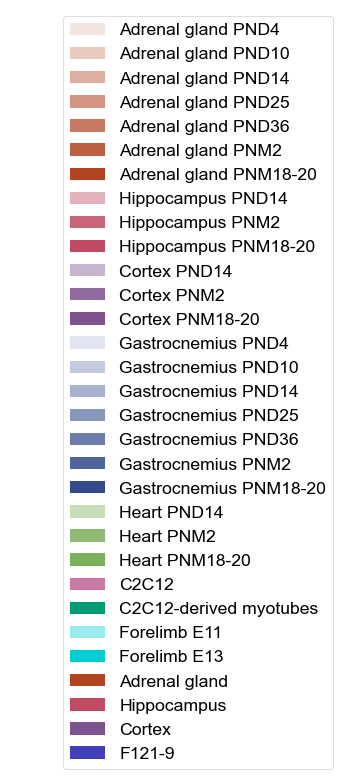

In [58]:
sns.set_context('paper', font_scale=2)
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42

df = adata.obs.copy(deep=True)
df = df[['sample', 'sample_display']].drop_duplicates()
c_dict_2 = {}
for key, item in cmap.items():
    try:
        key2 = df.loc[df['sample'] == key, 'sample_display'].values[0]
        c_dict_2[key2] = item
    except:
        pass
# order = adata.obs['sample'].cat.categories
display_order = [df.loc[df['sample']==s, 'sample_display'].values[0] for s in order]
print(order)
print('display_order')
print(display_order)
df['sample_display'] = df['sample_display'].astype('category')
df['sample_display'].cat.categories = display_order
import matplotlib.patches as patches
samples = []
for s in display_order:
    c = c_dict_2[s]
    samples.append(patches.Rectangle((0,0),1,1,facecolor=c))
ax = sns.scatterplot()
plt.legend(samples, df.sample_display.cat.categories)

ax.set_xticklabels('')
ax.set_yticklabels('')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

fname = f'{fig_dir}/mouse_lr_bulk_samples.pdf'
plt.savefig(fname, dpi=700, bbox_inches='tight')

In [ ]:
# df = pd.read_csv('swan/mouse_metadata.tsv', sep='\t')
# print(df.head())
# df = df[['sample', 'sample_display', 'classification']]
# df = df.drop_duplicates()
# df = df.sort_values(by=['classification', 'sample_display'], ascending=True)
# # order = df.sample_display.tolist()
# order = []
# df['number'] = [i for i in range(len(df.index))]


# obs_col = 'sample'
# cmap, order = get_lr_bulk_sample_colors()
# adata.obs[obs_col] = adata.obs[obs_col].astype('category')
# obs_order = list(adata.obs_names)
# sample_order = adata.obs[obs_col].cat.categories.tolist()
# sample_colors = [cmap[s] for s in sample_order]
# adata.uns['{}_colors'.format(obs_col)] = sample_colors
# order = [o for o in order if o in sample_order]



# c_dict_2 = {}
# for key, item in c_dict.items():
#     try:
#         key2 = df.loc[df['sample'] == key, 'sample_display'].values[0]
#     except:
#         pass
#     c_dict_2[key2] = item
# df['sample_display'] = df['sample_display'].astype('category')
# df['sample_display'].cat.categories = order
# import matplotlib.patches as patches
# samples = []
# for s in df.sample_display.cat.categories:
#     c = c_dict_2[s]
#     samples.append(patches.Rectangle((0,0),1,1,facecolor=c))
# ax = sns.scatterplot()
# plt.legend(samples, df.sample_display.cat.categories)

# ax.set_xticklabels('')
# ax.set_yticklabels('')

# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_visible(False)

# fname = f'{fig_dir}/mouse_lr_bulk_samples.pdf'
# plt.savefig(fname, dpi=700, bbox_inches='tight')

    
# # ax = sns.catplot(data=df, x='number', y='number',
# #             hue='sample_display', palette=c_dict_2, order=order)


## Umaps

In [3]:
df = pd.read_csv(filt_ab, sep='\t')
df, tids = get_tpm_table(df,
               how='iso',
               min_tpm=1,
               ver=ver,
               species=species,
               gene_subset='polya')

Calculating iso TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1816: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1815: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # isos detected: 149463
# isos >= 1 tpm: 138642
Applying gene type and novelty subset
Number of isos reported: 135450


In [4]:
sg = swan.read(swan_file)

Read in graph from swan/swan.p


Trying to set attribute `.obs` of view, copying.
/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'tissue' as categorical
/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'age' as categorical
/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is d

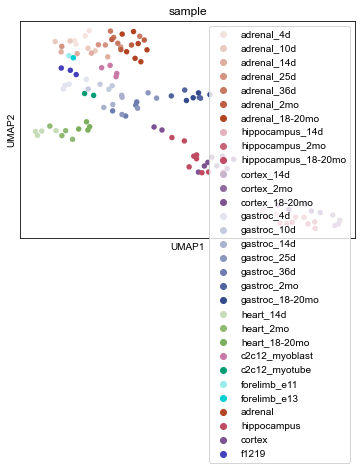

In [22]:
# by sample
adata = sg.adata[:, tids]
len(adata.var.index)

# color
# add colors
# map values in order specific to
obs_col = 'sample'
cmap, order = get_lr_bulk_sample_colors()
adata.obs[obs_col] = adata.obs[obs_col].astype('category')
obs_order = list(adata.obs_names)
sample_order = adata.obs[obs_col].cat.categories.tolist()
sample_colors = [cmap[s] for s in sample_order]
adata.uns['{}_colors'.format(obs_col)] = sample_colors
order = [o for o in order if o in sample_order]
# adata.obs[obs_col].cat.reorder_categories(order, inplace=True)


# also store rgb values in dict for use with gen_report
for key, item in cmap.items():
    item = item[1:]
    r,g,b = tuple(int(item[i:i+2], 16) for i in (0, 2, 4))
    cmap[key] = (r,g,b)
adata.uns['{}_dict'.format(obs_col)] = cmap

# normalize data matrix to 10,000 count
sc.pp.normalize_total(adata, target_sum=1e4)

# log 
sc.pp.log1p(adata)
adata.raw = adata

# find highly variable genes
sc.pp.highly_variable_genes(adata, n_top_genes = 70000, flavor = 'seurat',
    min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pp.scale(adata, max_value=10)

# sc.tl.pca(adata, use_highly_variable=False)
sc.tl.pca(adata, use_highly_variable=True)

sc.pp.neighbors(adata, metric='cosine')
sc.pp.neighbors(adata)
sc.tl.umap(adata)

mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42

sc.pl.umap(adata, color='sample', frameon=True, size=120, show=False)

f = plt.gcf()
f.savefig('figures/mouse_lr_umap.pdf', dpi=500, bbox_inches='tight')
f.savefig(fig_dir+'mouse_lr_umap.pdf', dpi=500, bbox_inches='tight')



handles, labels = plt.gca().get_legend_handles_labels()
order_inds = dict([(labels[i], i) for i in range(len(labels))])
order = [order_inds[sample] for sample in order]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order]) 

# plt.gca().legend(bbox_to_anchor=(1.1, 1.05))


f = plt.gcf()
f.savefig('figures/mouse_lr_umap_legend.pdf', dpi=500, bbox_inches='tight')
f.savefig(fig_dir+'mouse_lr_umap_legend.pdf', dpi=500, bbox_inches='tight')



In [24]:
sg.adata.obs.tissue.unique()

array(['hippocampus', 'cortex', 'adrenal', 'heart', 'gastroc',
       'c2c12_myotube', 'f1219', 'c2c12_myoblast', 'forelimb'],
      dtype=object)

Trying to set attribute `.obs` of view, copying.


['cell_line', 'tissue', 'brain']
{'cell_line': '#7680e8', 'tissue': '#e39f24', 'brain': '#b0799a'}
['brain', 'cell_line', 'tissue']
['brain', 'tissue', 'cell_line']
Categories (3, object): ['brain', 'cell_line', 'tissue']


/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'tissue' as categorical
/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'age' as categorical
/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version

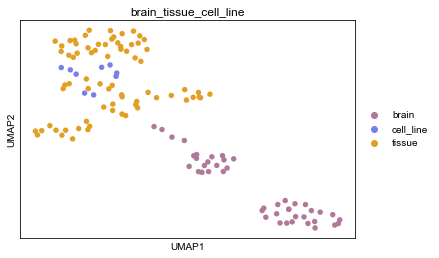

In [27]:
# by cell line, tissue, brain
adata = sg.adata[:, tids]
len(adata.var.index)

obs_col = 'brain_tissue_cell_line'
adata.obs[obs_col] = 'tissue'
adata.obs.loc[adata.obs['sample'].isin(['c2c12_myoblast', 'c2c12_myotube', 'f1219']), obs_col] = 'cell_line'
adata.obs.loc[adata.obs['sample'].str.contains('hippo'), obs_col] = 'brain'
adata.obs.loc[adata.obs['sample'].str.contains('cortex'), obs_col] = 'brain'

# add colors
# map values in order specific to
cmap, order = get_tissue_cell_line_colors()
cmap2, _ = get_biosample_colors()
brain_color = cmap2['brain'] 
order += ['brain']
print(order)
cmap['brain'] = brain_color
print(cmap)
adata.obs[obs_col] = adata.obs[obs_col].astype('category')
obs_order = list(adata.obs_names)
sample_order = adata.obs[obs_col].cat.categories.tolist()
print(sample_order)
print(adata.obs[obs_col].unique())
sample_colors = [cmap[s] for s in sample_order]
adata.uns['{}_colors'.format(obs_col)] = sample_colors

# also store rgb values in dict for use with gen_report
for key, item in cmap.items():
    item = item[1:]
    r,g,b = tuple(int(item[i:i+2], 16) for i in (0, 2, 4))
    cmap[key] = (r,g,b)
adata.uns['{}_dict'.format(obs_col)] = cmap

# normalize data matrix to 10,000 count
sc.pp.normalize_total(adata, target_sum=1e4)

# log 
sc.pp.log1p(adata)
adata.raw = adata

# find highly variable genes
sc.pp.highly_variable_genes(adata, n_top_genes = 70000, flavor = 'seurat',
    min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pp.scale(adata, max_value=10)

# sc.tl.pca(adata, use_highly_variable=False)
sc.tl.pca(adata, use_highly_variable=True)

sc.pp.neighbors(adata, metric='cosine')
sc.pp.neighbors(adata)
sc.tl.umap(adata)

mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42

sc.pl.umap(adata, color=obs_col, frameon=True, size=120, show=False)

f = plt.gcf()
f.savefig('figures/mouse_lr_umap_brain_tissue_cell_line.pdf', dpi=500, bbox_inches='tight')
f.savefig(fig_dir+'mouse_lr_umap_brain_tissue_cell_line.pdf', dpi=500, bbox_inches='tight')
